--
## MEDAL COUNT AND PERFORMANCE OF CANADA AND UK AT WINTER AND SUMMER OLYMPIC GAMES

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
from ipywidgets import interact

In [2]:
# Load olympic data in csv
athelete_df = pd.read_csv("/Users/jelenaraonic/UofTBootcamp/Raw Data/athlete_events.csv")
athelete_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
# Load country information in csv
regions_df = pd.read_csv("/Users/jelenaraonic/UofTBootcamp/Raw Data/noc_regions.csv")
regions_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [4]:
# Merge the dataframes
athelete_merged_df = pd.merge(athelete_df,regions_df,on='NOC',how='left')


In [5]:
# Data cleanup
athelete_merged_df['Medal'].fillna('DNW', inplace = True)
#athelete_merged_df.info()

In [6]:
athelete_merged_df.replace('USA', "United States of America", inplace = True)
athelete_merged_df.replace('Tanzania', "United Republic of Tanzania", inplace = True)
athelete_merged_df.replace('Democratic Republic of Congo', "Democratic Republic of the Congo", inplace = True)
athelete_merged_df.replace('Congo', "Republic of the Congo", inplace = True)
athelete_merged_df.replace('Lao', "Laos", inplace = True)
athelete_merged_df.replace('Syrian Arab Republic', "Syria", inplace = True)
athelete_merged_df.replace('Serbia', "Republic of Serbia", inplace = True)
athelete_merged_df.replace('Czechia', "Czech Republic", inplace = True)
athelete_merged_df.replace('UAE', "United Arab Emirates", inplace = True)
athelete_merged_df.replace('UK', "United Kingdom", inplace = True)

In [7]:
athelete_merged_df[['region','Team','NOC']]

,region,Team,NOC
0,China,China,CHN
1,China,China,CHN
2,Denmark,Denmark,DEN
3,Denmark,Denmark/Sweden,DEN
4,Netherlands,Netherlands,NED
...,...,...,...
271111,Poland,Poland-1,POL
271112,Poland,Poland,POL
271113,Poland,Poland,POL
271114,Poland,Poland,POL


In [8]:
# Function to map country to city

def host_country(col):
    if col == "Rio de Janeiro":
        return "Brazil"
    elif col == "London":
        return "United Kingdom"
    elif col == "Beijing":
        return  "China"
    elif col == "Athina":
        return  "Greece"
    elif col == "Sydney" or col == "Melbourne":
        return  "Australia"
    elif col == "Atlanta" or col == "Los Angeles" or col == "St. Louis" or col=="Lake Placid" or col=="Salt Lake City" or col=="Squaw Valley":
        return  "United States of America"
    elif col == "Barcelona":
        return  "Spain"
    elif col == "Seoul":
        return  "South Korea"
    elif col == "Moskva" or col=="Sochi":
        return  "Russia"
    elif col == "Montreal" or col == "Calgary" or col=="Vancouver":
        return  "Canada"
    elif col == "Munich" or col == "Berlin" or col=="Garmisch-Partenkirchen":
        return  "Germany"
    elif col == "Mexico City":
        return  "Mexico"
    elif col == "Tokyo" or col=="Nagano" or col=="Sapporo":
        return  "Japan"
    elif col == "Roma" or col=="Cortina d'Ampezzo" or col=="Torino":
        return  "Italy"
    elif col == "Paris" or col=="Albertville" or col == "Chamonix" or col=="Grenoble":
        return  "France"
    elif col == "Helsinki":
        return  "Finland"
    elif col == "Amsterdam":
        return  "Netherlands"
    elif col == "Antwerpen":
        return  "Belgium"
    elif col == "Stockholm":
        return  "Sweden"
    elif col == "Innsbruck":
        return  "Austria"
    elif col == "Lillehammer" or col=="Oslo":
        return  "Norway"
    elif col == "Sankt Moritz":
        return  "Switzerland"
    else:
        return "Other"


# Applying this function

athelete_merged_df['Host_Country'] = athelete_merged_df['City'].apply(host_country)

In [9]:
# DataFrame with a hosting country of Olympic Games

athelete_merged_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Host_Country
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China,NaN,Spain
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China,NaN,United Kingdom
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark,NaN,Belgium
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,France
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,NaN,Canada


--
## SUMMER OLYMPIC GAMES

In [10]:
df_summer = athelete_merged_df.query('Season == "Summer"') 
df_summer.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Host_Country
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China,NaN,Spain
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China,NaN,United Kingdom
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark,NaN,Belgium
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,France
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,DNW,Netherlands,NaN,United States of America


In [11]:
#New dataframe with informations about hosting country 
df_new = df_summer.groupby(['Year','Host_Country','region','Medal'])['Medal'].count().unstack().fillna(0).astype(int).reset_index()

df_new['Is_Host'] = np.where(df_new['Host_Country'] == df_new['region'],1,0)
df_new['Total Medals'] = df_new['Bronze'] + df_new['Silver'] + df_new['Gold']

In [12]:
#medal count and visualisation of results 

medals = df_summer.groupby(['region','Medal'])['Medal'].count().unstack().fillna(0).astype(int)

medals['Total'] = medals['Bronze'] + medals['Silver'] + medals['Gold']

medals = medals[['Bronze','Silver','Gold','Total']].sort_values(by='Total', ascending=False)

medals.iloc[:15].style.set_caption('Medals by Country: Summer Olympic Games [Top 20]')\
.bar(subset=['Gold'], color='#f0c05a')\
.bar(subset=['Silver'], color='Lightgray')\
.bar(subset=['Bronze'], color='#a97142')


Medal,Bronze,Silver,Gold,Total
region,,,,
United States of America,1197,1333,2472,5002
Russia,994,974,1220,3188
Germany,1064,987,1075,3126
United Kingdom,620,729,636,1985
France,587,575,465,1627
Italy,454,474,518,1446
Australia,515,456,362,1333
Hungary,363,328,432,1123
Sweden,358,396,354,1108


--
### CANADA'S PERFORMANCE OVER YEARS in SUMMER OLYMPICS

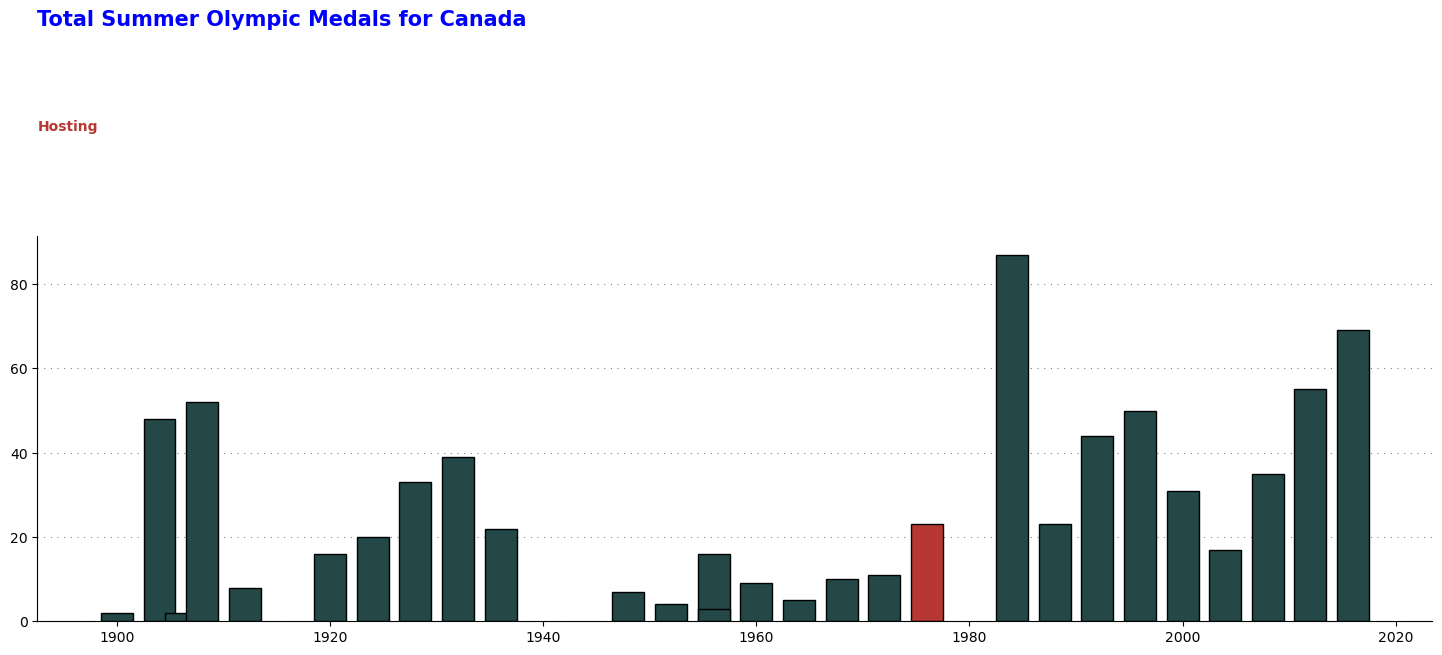

In [13]:


temp = df_new.query("region == 'Canada'")


fig, ax = plt.subplots(1, 1, figsize=(18, 5), facecolor='white')

color = ['#B73832' if i == 1 else '#244747' for i in temp['Is_Host']]

ax.bar(temp['Year'], temp['Total Medals'],width=3, color=color, ec='black')
ax.set_facecolor('white')
ax.grid(which='both', axis='y', zorder=5, color='gray', linestyle=':', dashes=(1,5))
ax.set_axisbelow(True)

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text(Xstart,Yend+50, 'Total Summer Olympic Medals for Canada', fontsize=15,fontweight='bold',color='blue')
ax.text(Xstart,Yend+25, 'Hosting', fontsize=10,fontweight='bold',color='#B73832')

plt.show()

### UNITED KINGDOM'S PERFORMANCE OVER YEARS in SUMMER OLYMPICS

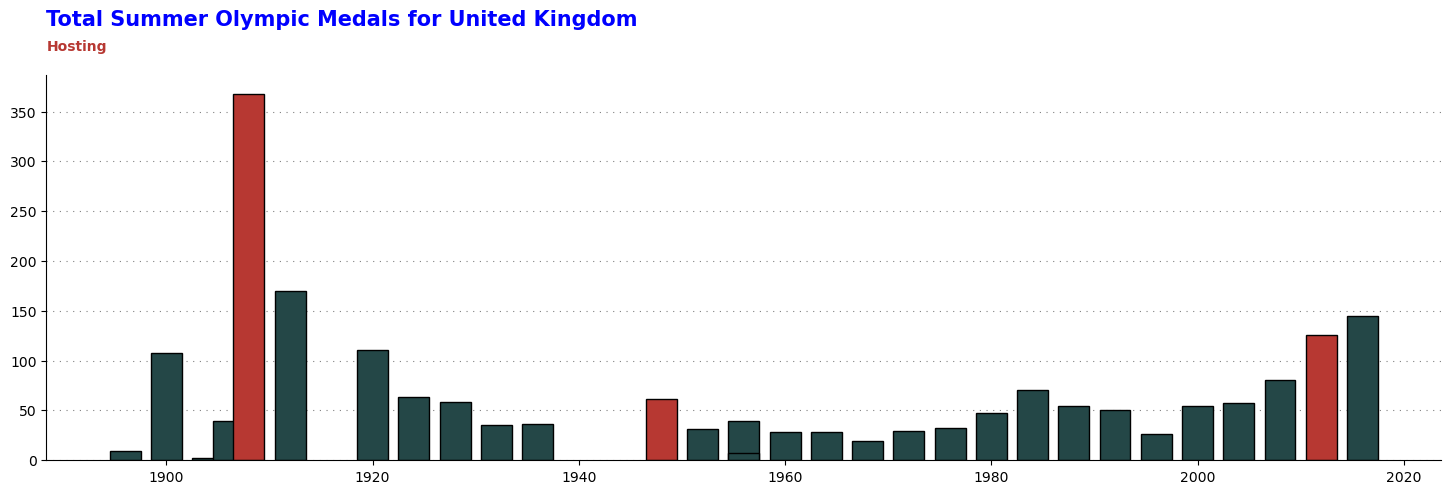

In [14]:
temp = df_new.query("region == 'United Kingdom'")


fig, ax = plt.subplots(1, 1, figsize=(18, 5), facecolor='white')

color = ['#B73832' if i == 1 else '#244747' for i in temp['Is_Host']]

ax.bar(temp['Year'], temp['Total Medals'],width=3, color=color, ec='black')
ax.set_facecolor('white')
ax.grid(which='both', axis='y', zorder=5, color='gray', linestyle=':', dashes=(1,5))
ax.set_axisbelow(True)

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text(Xstart,Yend+50, 'Total Summer Olympic Medals for United Kingdom', fontsize=15,fontweight='bold',color='blue')
ax.text(Xstart,Yend+25, 'Hosting', fontsize=10,fontweight='bold',color='#B73832')

plt.show()

--
## WINTER OLYMPIC GAMES

In [15]:
df_winter = athelete_merged_df.query('Season == "Winter"') 
df_winter.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Host_Country
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,NaN,Canada
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",DNW,Netherlands,NaN,Canada
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,NaN,France
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",DNW,Netherlands,NaN,France
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,NaN,Norway


In [16]:
#New dataframe with informations about hosting country 
df_new1 = df_winter.groupby(['Year','Host_Country','region','Medal'])['Medal'].count().unstack().fillna(0).astype(int).reset_index()

df_new1['Is_Host'] = np.where(df_new1['Host_Country'] == df_new1['region'],1,0)
df_new1['Total Medals'] = df_new1['Bronze'] + df_new1['Silver'] + df_new1['Gold']

In [17]:
medals = df_winter.groupby(['region','Medal'])['Medal'].count().unstack().fillna(0).astype(int)

medals['Total'] = medals['Bronze'] + medals['Silver'] + medals['Gold']

medals = medals[['Bronze','Silver','Gold','Total']].sort_values(by='Total', ascending=False)

medals.iloc[:15].style.set_caption('Medals by Country: Summer Olympic Games [Top 20]')\
.bar(subset=['Gold'], color='#f0c05a')\
.bar(subset=['Silver'], color='Lightgray')\
.bar(subset=['Bronze'], color='#a97142')\
#.background_gradient(subset=['Total'], cmap='BuGn')

Medal,Bronze,Silver,Gold,Total
region,,,,
Russia,184,196,379,759
United States of America,161,308,166,635
Germany,196,208,226,630
Canada,107,199,305,611
Norway,127,165,151,443
Sweden,177,126,125,428
Finland,215,145,66,426
Austria,103,98,79,280
Switzerland,129,70,76,275


### CANADA'S PERFORMANCE OVER YEARS in WINTER OLYMPICS

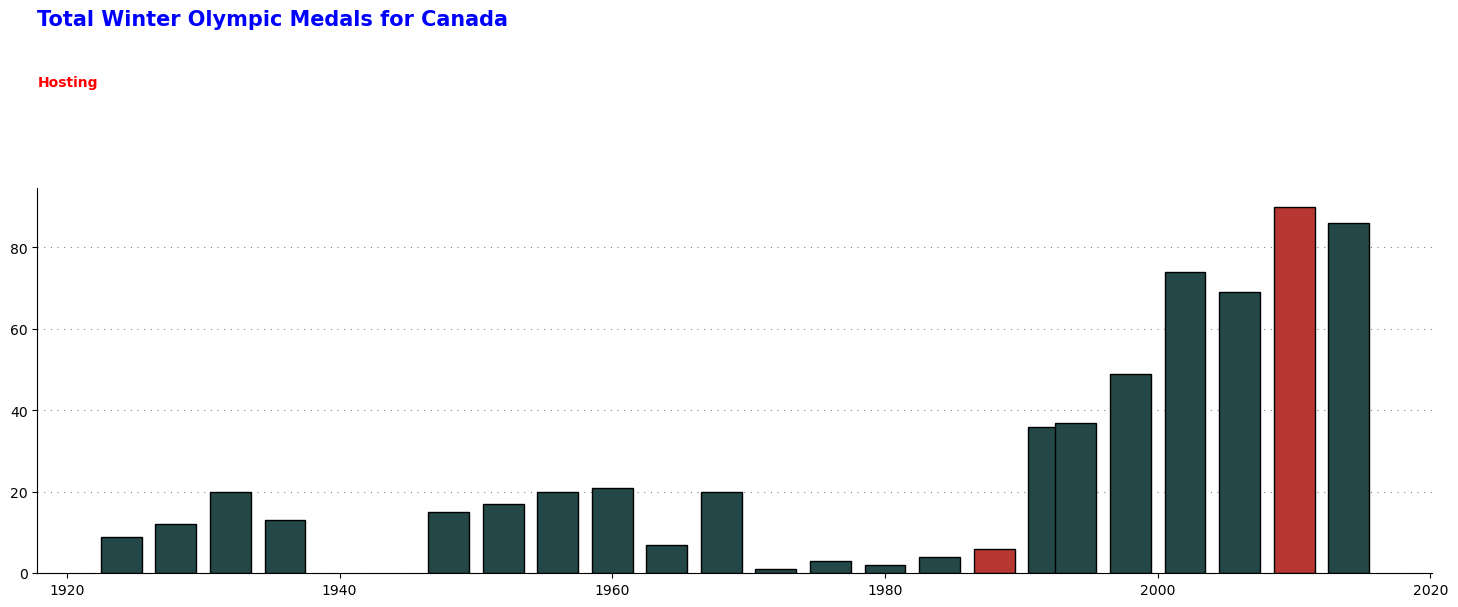

In [18]:
temp = df_new1.query("region == 'Canada'")


fig, ax = plt.subplots(1, 1, figsize=(18, 5), facecolor='white')

color = ['#B73832' if i == 1 else '#244747' for i in temp['Is_Host']]

ax.bar(temp['Year'], temp['Total Medals'],width=3, color=color, ec='black')
ax.set_facecolor('white')
ax.grid(which='both', axis='y', zorder=5, color='gray', linestyle=':', dashes=(1,5))
ax.set_axisbelow(True)

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text(Xstart,Yend+40, 'Total Winter Olympic Medals for Canada', fontsize=15,fontweight='bold',color='blue')
ax.text(Xstart,Yend+25, 'Hosting', fontsize=10,fontweight='bold',color='red')

plt.show()

### UNITED KINGDOM'S PERFORMANCE OVER YEARS in WINTER OLYMPICS

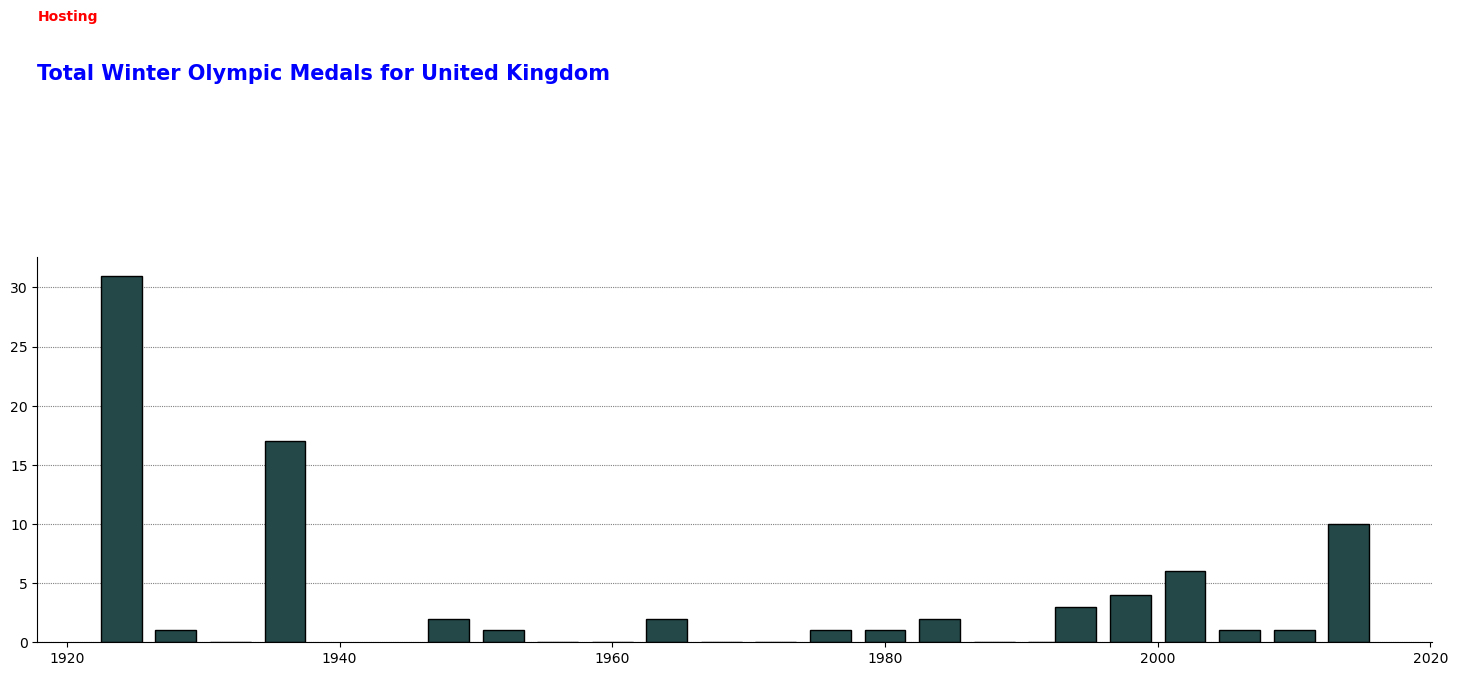

In [19]:
temp = df_new1.query("region == 'United Kingdom'")


fig, ax = plt.subplots(1, 1, figsize=(18, 5), facecolor='white')

color = ['#B73832' if i == 1 else '#244747' for i in temp['Is_Host']]

ax.bar(temp['Year'], temp['Total Medals'],width=3, color=color, ec='black')
ax.set_facecolor('white')
ax.grid(which='both', axis='y', zorder=5, color='gray', linestyle=':', dashes=(1,1))
ax.set_axisbelow(True)

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text(Xstart,Yend+15, 'Total Winter Olympic Medals for United Kingdom', fontsize=15,fontweight='bold',color='blue')
ax.text(Xstart,Yend+20, 'Hosting', fontsize=10,fontweight='bold',color='red')

plt.show()